# Example of multi-panel plotting of all galaxies in HDF5 file.

In [1]:
import numpy as np
from edge_pydb import EdgeTable
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from edge_pydb.plotting import gridplot

In [2]:
sspcols  = ['Name','ix','iy','sigstar_sm','fe_sigstar_sm']
fluxcols = ['Name','ix','iy','EW_Halpha_sm','flux_sigsfr0_sm','e_flux_sigsfr0_sm']

fluxtab = EdgeTable('edge.pipe3d.hdf5', path='flux_elines_sm', cols=fluxcols)
ssptab = EdgeTable('edge.pipe3d.hdf5', path='SSP_sm', cols=sspcols)
print('Working on full EDGE database')

# consolidate the tables and calculate sSFR
fluxtab.join(ssptab, keys=['Name', 'ix', 'iy'])
fluxtab['specSFR'] = fluxtab['flux_sigsfr0_sm'].quantity/fluxtab['sigstar_sm'].quantity
# Halpha EW image values are negative
fluxtab['EW_Halpha_sm'] = -fluxtab['EW_Halpha_sm']
print(fluxtab.colnames)

Working on full EDGE database
['Name', 'ix', 'iy', 'EW_Halpha_sm', 'flux_sigsfr0_sm', 'e_flux_sigsfr0_sm', 'sigstar_sm', 'fe_sigstar_sm', 'specSFR']


Plotting ARP220 to NGC4211NED02


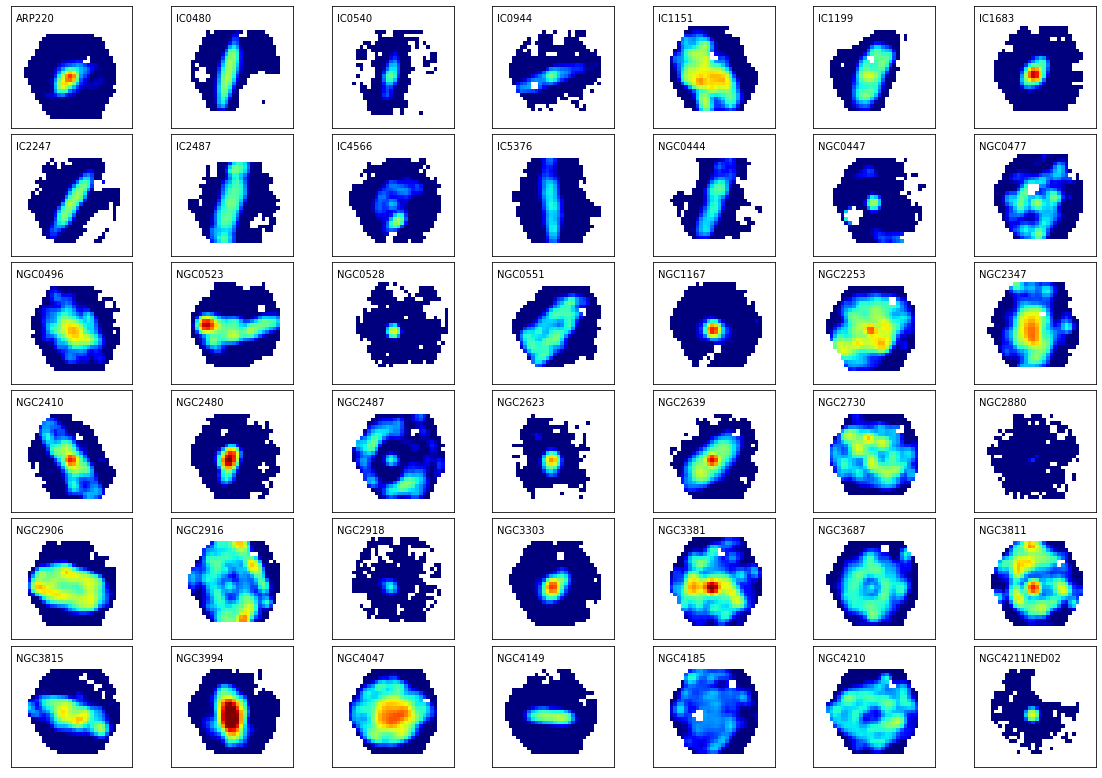

Plotting NGC4470 to NGC6314


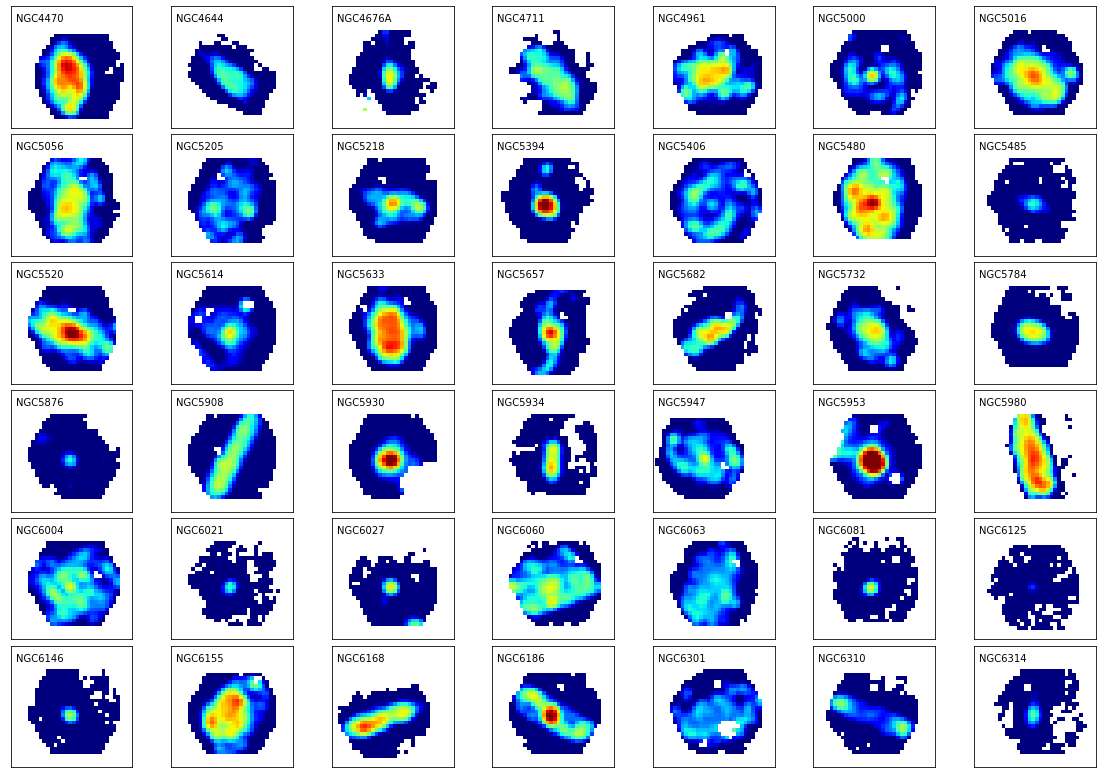

Plotting NGC6361 to UGC10710


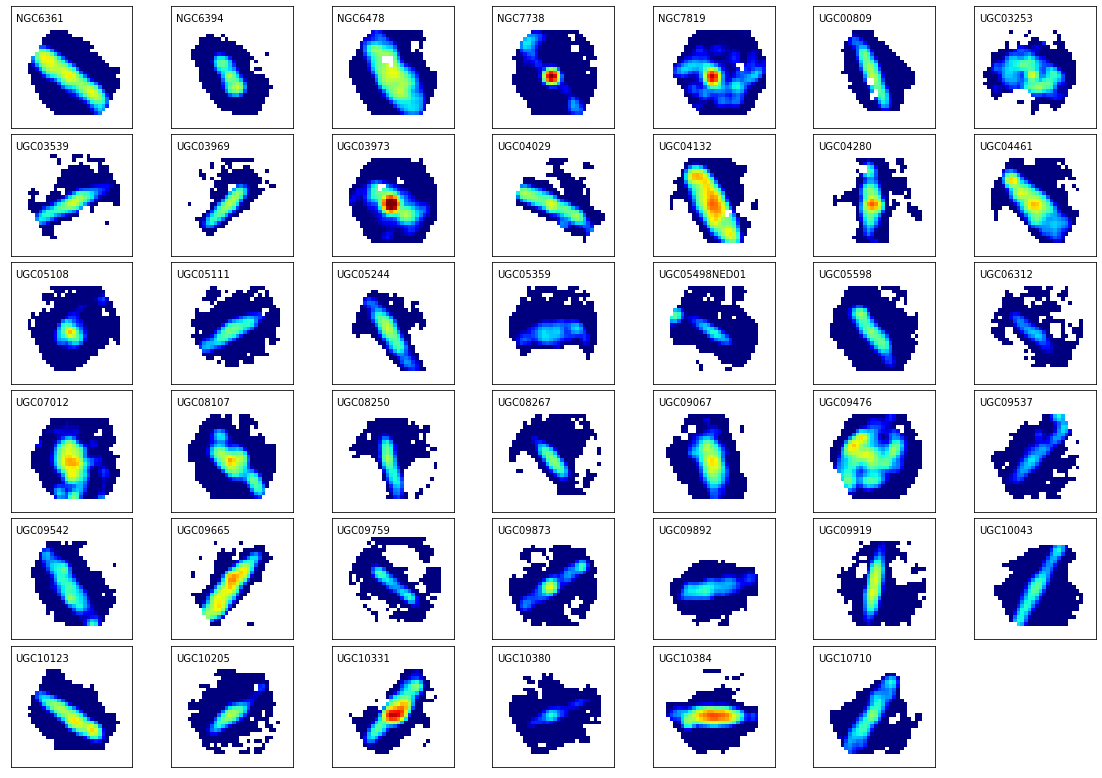

In [3]:
gallist = list(np.unique(fluxtab['Name']))
gridplot(edgetab=fluxtab, gallist=gallist, column='flux_sigsfr0_sm', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=1, vmax=100))

Plotting ARP220 to NGC4211NED02


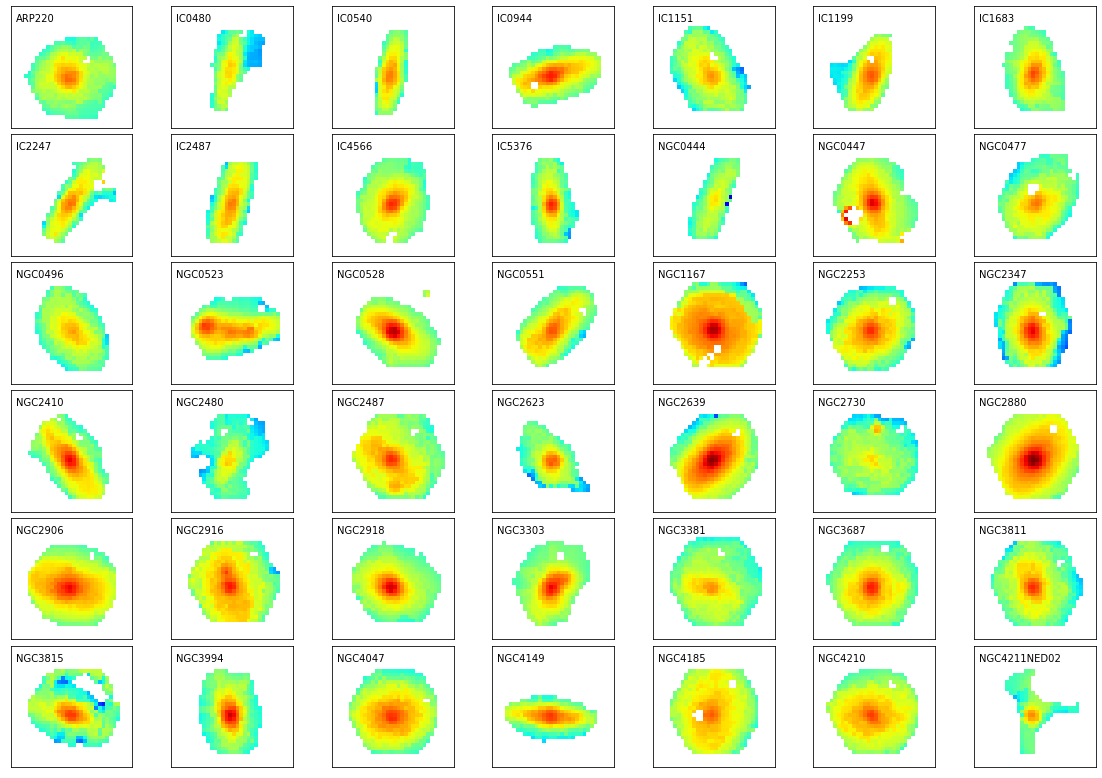

Plotting NGC4470 to NGC6314


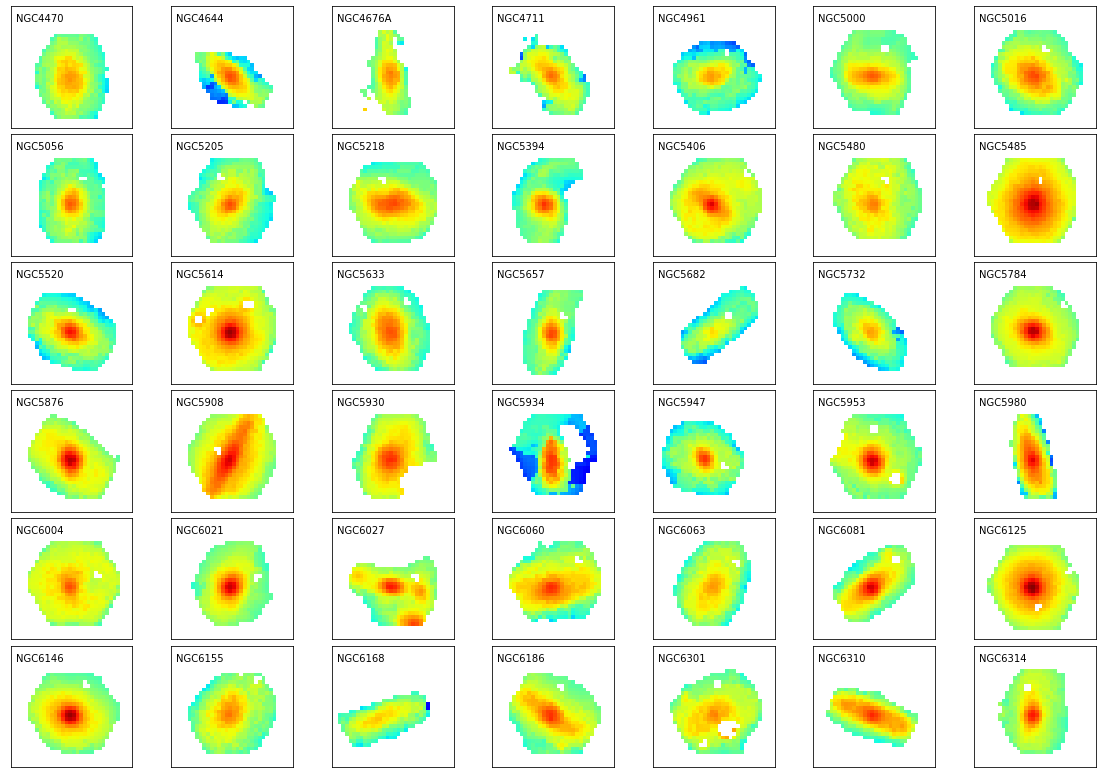

Plotting NGC6361 to UGC10710


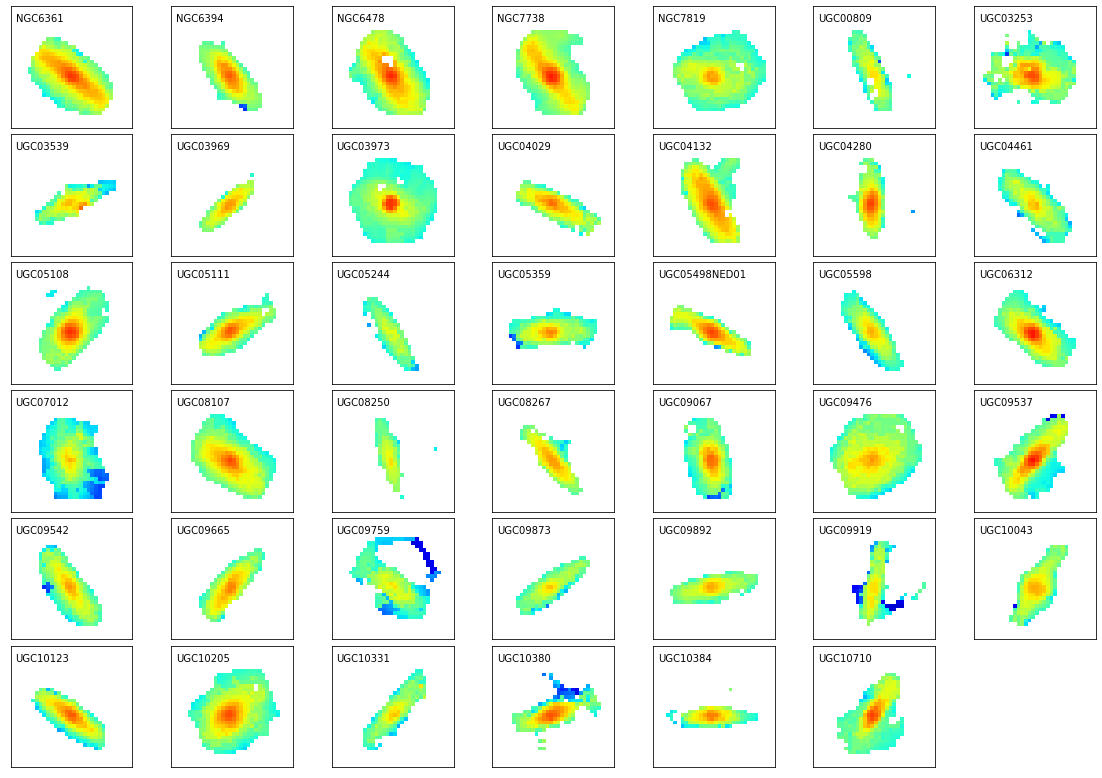

In [4]:
gridplot(edgetab=fluxtab, gallist=gallist, column='sigstar_sm', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=0.1, vmax=10000))

Plotting ARP220 to NGC4211NED02


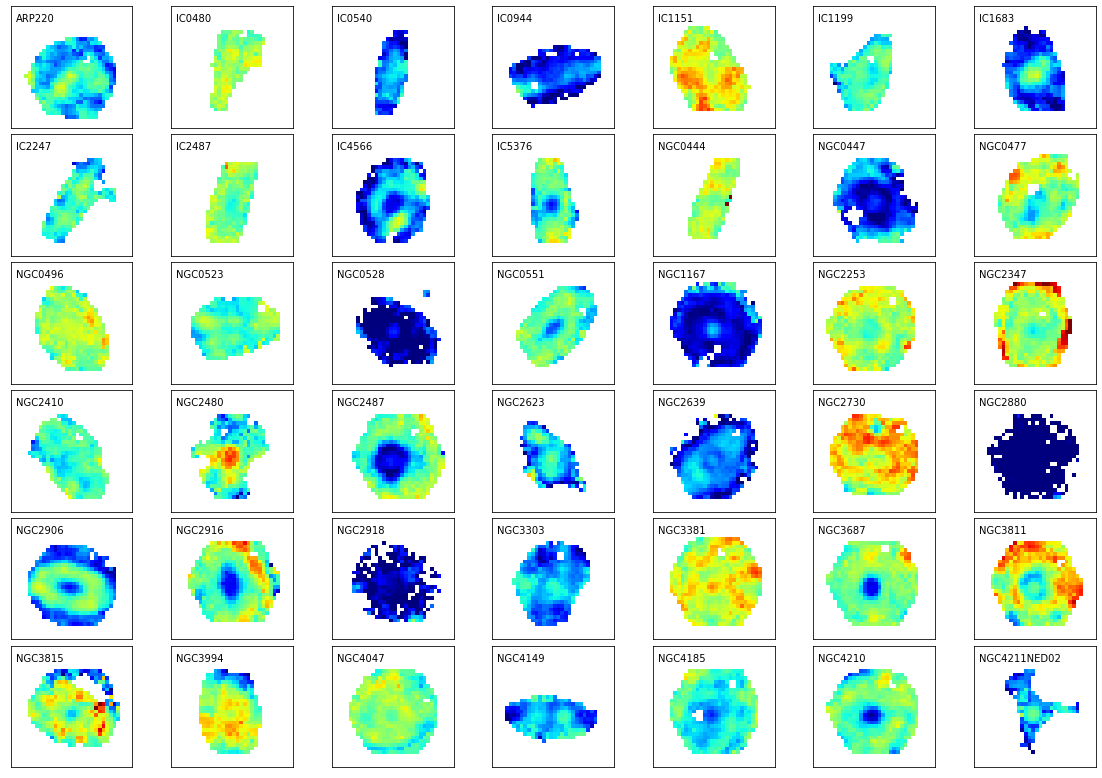

Plotting NGC4470 to NGC6314


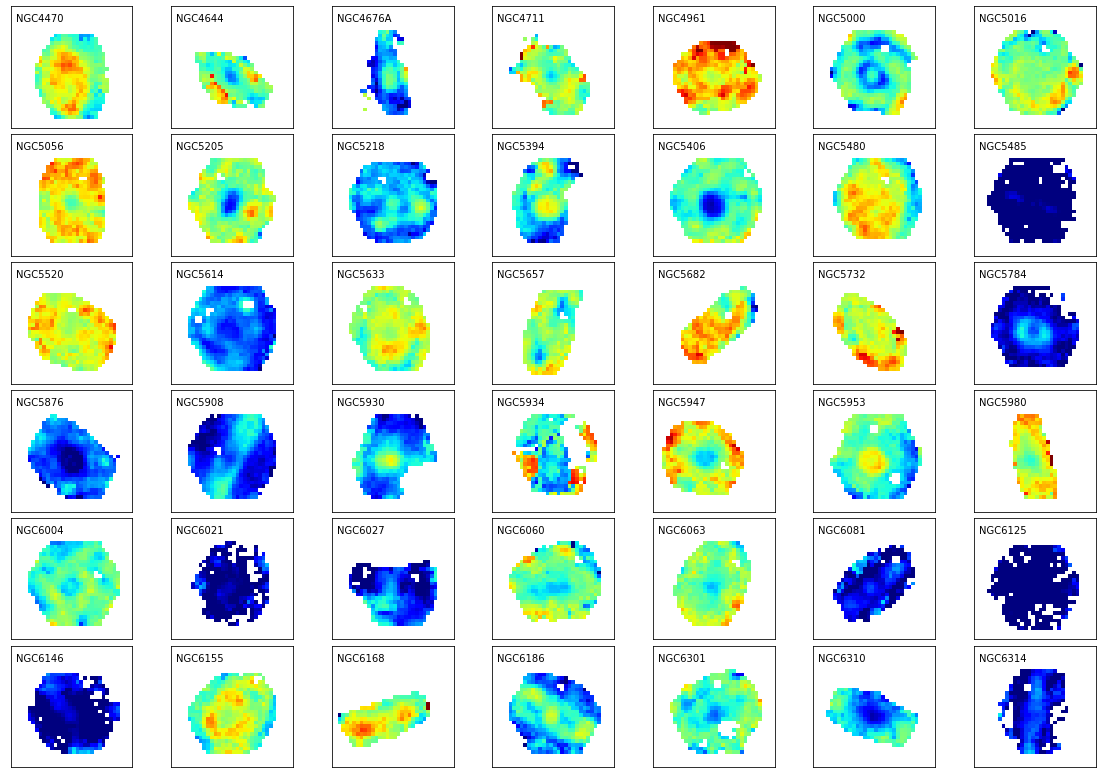

Plotting NGC6361 to UGC10710


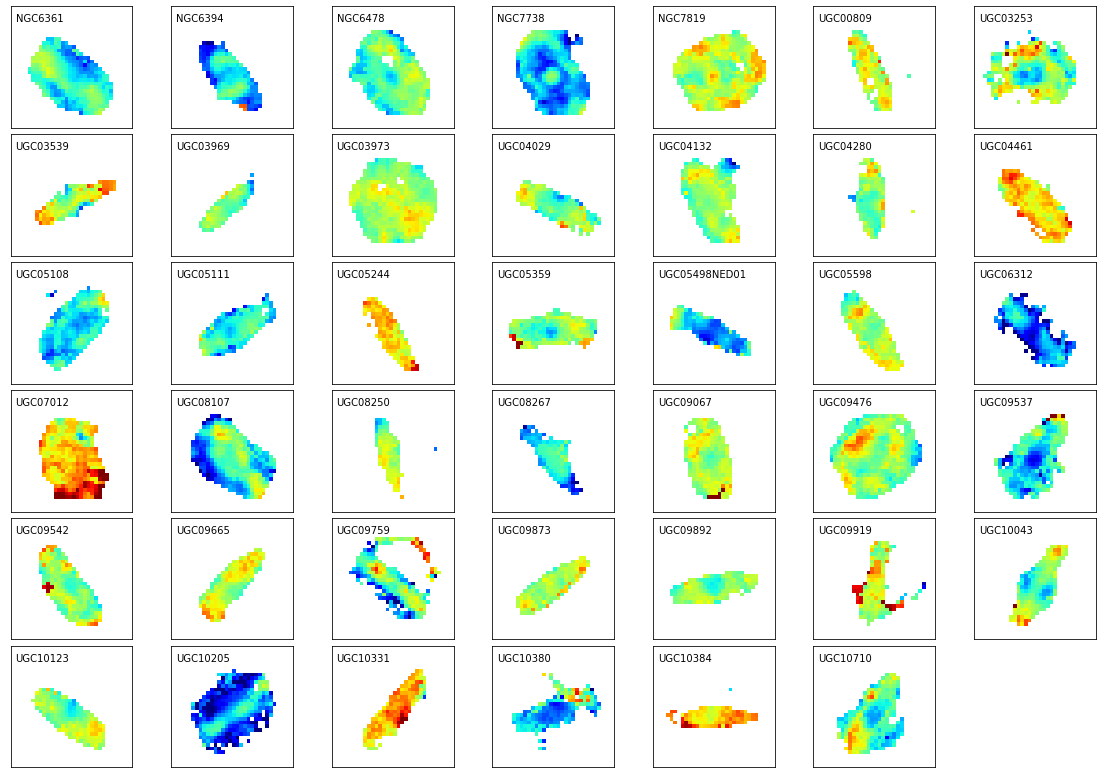

In [5]:
# vmin and vmax in Gyr^{-1}
gridplot(edgetab=fluxtab, gallist=gallist, column='specSFR', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=0.001, vmax=1))

Plotting ARP220 to NGC4211NED02


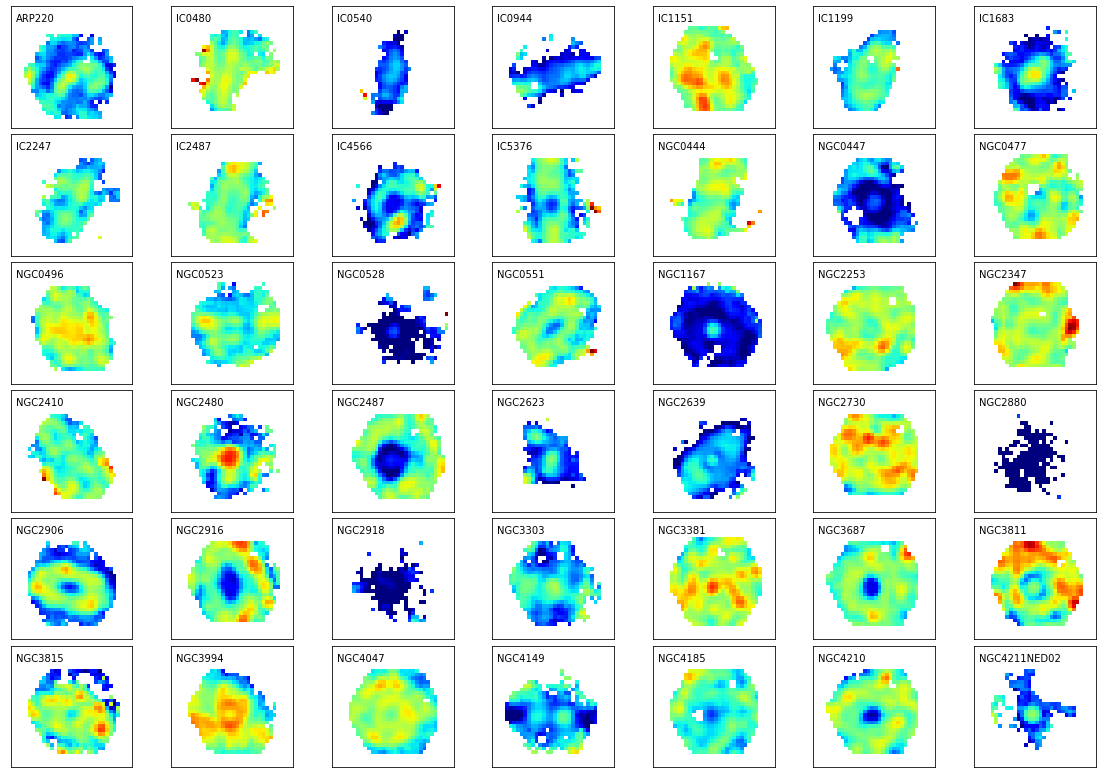

Plotting NGC4470 to NGC6314


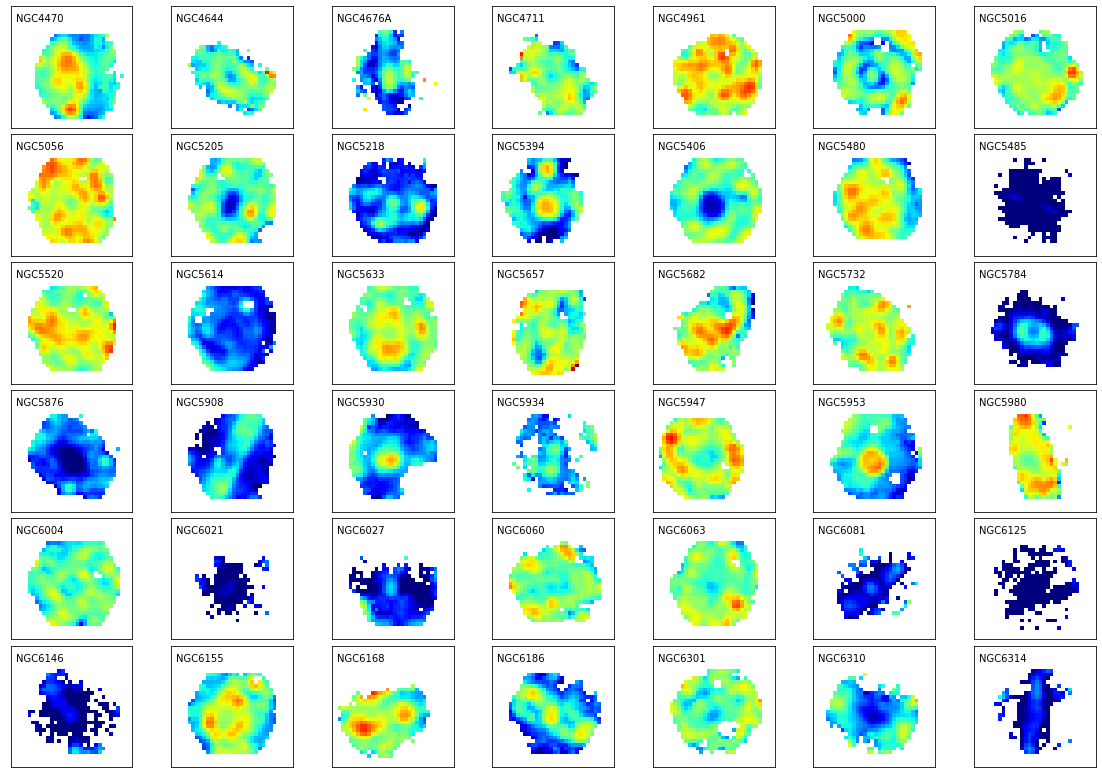

Plotting NGC6361 to UGC10710


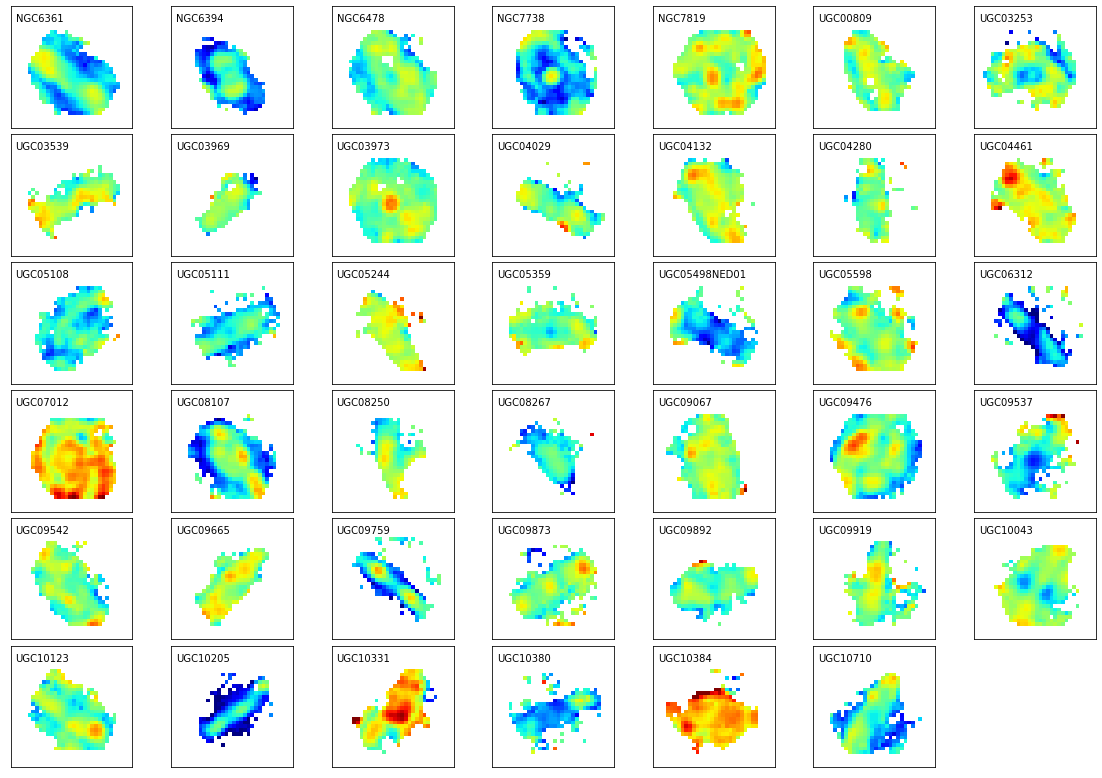

In [6]:
# vmin and vmax in Angstrom
gridplot(edgetab=fluxtab, gallist=gallist, column='EW_Halpha_sm', plotstyle='image',
        xrange=[5,38], yrange=[7,40], norm=LogNorm(vmin=1, vmax=200))